<a href="https://colab.research.google.com/github/yejin0455/sesac-ML/blob/main/D07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
# X, y 데이터를 만들어 봅시다.
fish_input = fish.drop('Species', axis=1)
fish_target = fish['Species'].to_numpy()

In [ ]:
fish_input.shape, fish_target.shape

((159, 5), (159,))

In [ ]:
# train/test set 만들어 봅시다.
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
train_input.shape, train_target.shape

((119, 5), (119,))

In [ ]:
test_input.shape, test_target.shape

((40, 5), (40,))

In [ ]:
# 전처리 과정으로 변환기를 이용한 스케일링을 합니다.
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확률적 경사하강법을 적용
sc = SGDClassifier(loss='log', random_state=42, max_iter=10)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [ ]:
# 정답과 예측한 클래스로 모형을 평가해 봅시다.
print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

0.773109243697479
0.775


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

0.8823529411764706
0.9


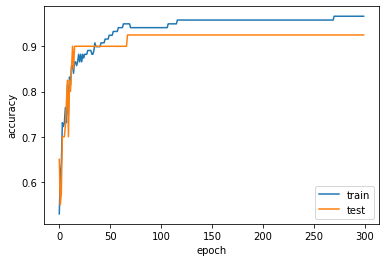

In [ ]:
# 에포크와 언더피트/오버피트 관계를 살펴봅시다.

sc = SGDClassifier(loss='log', random_state=42)
classes = np.unique(train_target)
train_score, test_score = [], []

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(accuracy_score(train_target, sc.predict(train_scaled)))
  test_score.append(accuracy_score(test_target, sc.predict(test_scaled)))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)
sc.fit(train_scaled, train_target)
print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

0.957983193277311
0.925
